# 1. Classification

In [3]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [ ]:
# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

# KNN

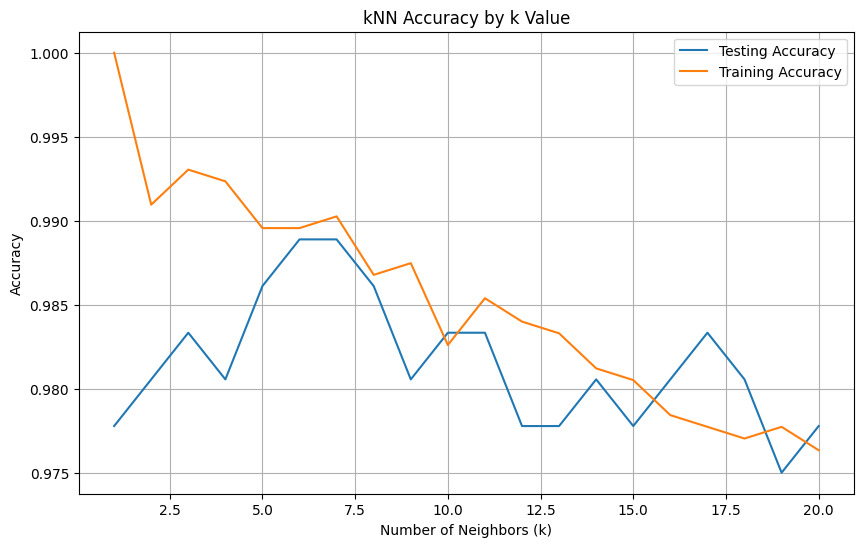

In [5]:
#kNN Classifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

digits = load_digits()

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

number_neighbors = []
testing_scores = []
training_scores = []

k_values = range(1, 21)  # trying k values from 1 to 20

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k)

    kNN.fit(x_train, y_train)

    number_neighbors.append(k)

    training_scores.append(kNN.score(x_train, y_train))

    testing_scores.append(kNN.score(x_test, y_test))

# Plot the accuracy scores by k value
plt.figure(figsize=(10, 6))
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.title('kNN Accuracy by k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In this case, K = 2 looks best

# Kernels

In [6]:
# SVM/SVC Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming x_train, x_test, y_train, y_test are already defined
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming x_train, x_test, y_train, y_test are already defined
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00       

The linear and poly kernals look the best

# Naive Bayes

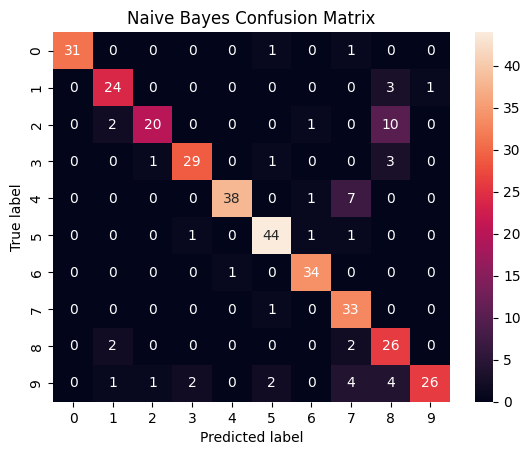

In [ ]:

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Naive Bayes": GaussianNB(),

}

accuracy_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()



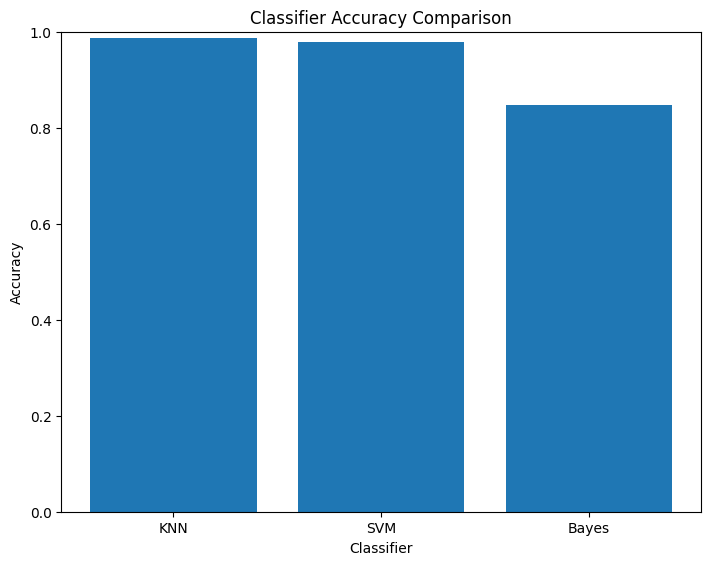

In [ ]:
# Compare the accuracy of different classifiers in the same plot.

classifiers = [
    KNeighborsClassifier(n_neighbors=5),  # KNN classifier with 5 neighbors
    SVC(kernel='linear'),  # Linear SVM classifier
    GaussianNB()  # Naïve Bayes classifier
]

scores = []
labels = ["KNN", "SVM", "Bayes"]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    scores.append(score)

# Plot the accuracy scores for each classifier
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.ylim(0.0, 1.0)
plt.show()


# 2. Regression

In [ ]:
# Load gapminderg
df = pd.read_csv("/content/gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<ipython-input-1-a89d5fda40a2>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


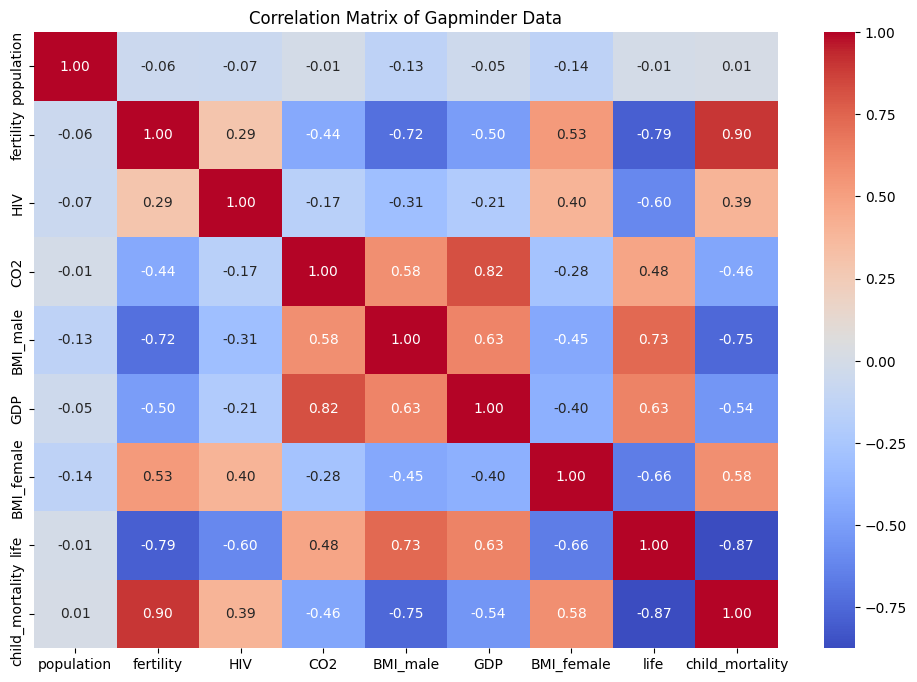

In [ ]:
# Heatmap

df = pd.read_csv("/content/gapminder.csv")

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Gapminder Data")
plt.show()


0.6192442167740035


/Users/lunarypro/opt/miniconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Users/lunarypro/opt/miniconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/Users/lunarypro/opt/miniconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == "__main__":


Text(0, 0.5, 'Life Expectency')

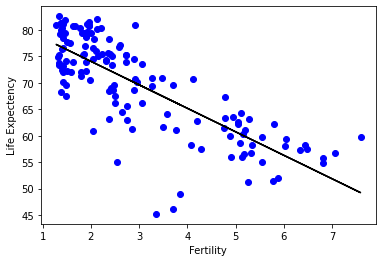

In [ ]:
# Linear Regression
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(...)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(...)
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")

In [ ]:

# Load the Gapminder dataset
df = pd.read_csv("/content/gapminder.csv")

X_all = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(X_all, y)
score_all = regression_all.score(X_all, y)
print("Model score with all features:", score_all)

X_gdp = df[["GDP"]]
regression_gdp = LinearRegression()
regression_gdp.fit(X_gdp, y)
score_gdp = regression_gdp.score(X_gdp, y)
print("Model score with one feature (GDP):", score_gdp)

# Compare the model scores
print("Score with all features is higher by:", score_all - score_gdp)


Model score with all features: 0.8974995317332959
Model score with one feature (GDP): 0.395639362854469
Score with all features is higher by: 0.5018601688788269


In [ ]:

# Load the Gapminder dataset
df = pd.read_csv("/content/gapminder.csv")

X_all = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
scores_all = cross_val_score(regression_all, X_all, y, cv=5)
print("Cross-validated scores with all features:", scores_all)

print("Mean score with all features:", scores_all.mean())
print("Standard deviation of scores with all features:", scores_all.std())

X_gdp = df[["GDP"]]
regression_gdp = LinearRegression()
scores_gdp = cross_val_score(regression_gdp, X_gdp, y, cv=5)
print("\nCross-validated scores with one feature (GDP):", scores_gdp)

# Print the mean and standard deviation of the cross-validated scores
print("Mean score with one feature (GDP):", scores_gdp.mean())
print("Standard deviation of scores with one feature (GDP):", scores_gdp.std())


Cross-validated scores with all features: [0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]
Mean score with all features: 0.8628894343259944
Standard deviation of scores with all features: 0.053410613643324154

Cross-validated scores with one feature (GDP): [ 0.48447757  0.33233331  0.4111573  -0.01245088  0.39807265]
Mean score with one feature (GDP): 0.3227179892082768
Standard deviation of scores with one feature (GDP): 0.17441136461538664


# Logistic Regression

In [ ]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


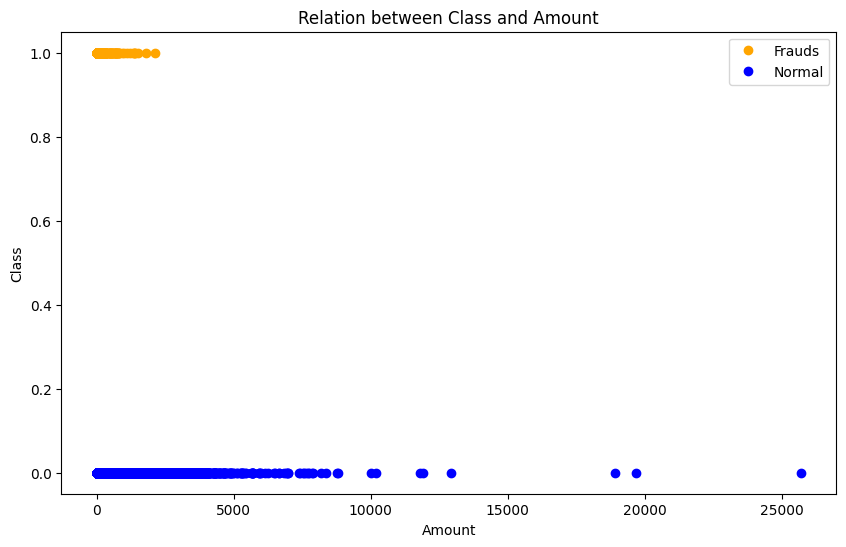

In [ ]:

# Load the 'creditcard.csv' file into a DataFrame
df = pd.read_csv("creditcard.csv")

frauds = df[df["Class"] == 1]
non_frauds = df[df["Class"] == 0]

# Plot the relation between Class and Amount
plt.figure(figsize=(10, 6))
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()
plt.title("Relation between Class and Amount")
plt.show()


All the fraud cases occur at low amounts

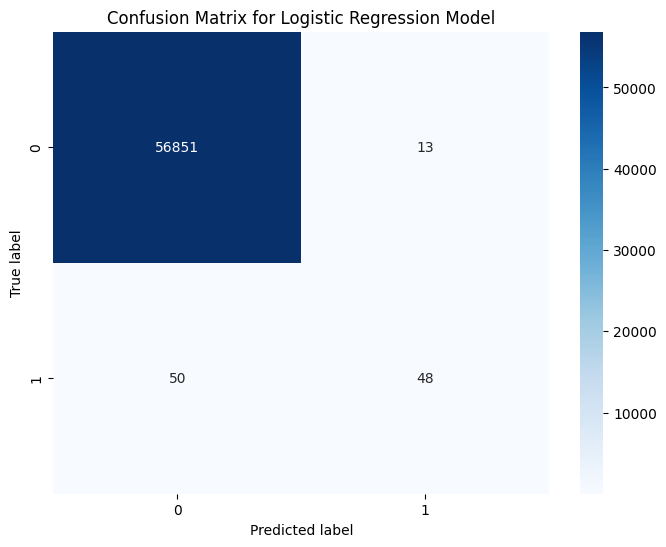

In [ ]:
# Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(X_train, y_train)

y_pred = log_regression.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()
